In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import os
import sys
import glob

In [2]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('../datasets/integrated_datasets.csv')

## 데이터 기본 정보

- 총 16847의 row가 있는 것을 확인할 수 있음

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16896 entries, 0 to 16895
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     16868 non-null  object
 1   content   15880 non-null  object
 2   category  2706 non-null   object
 3   url       15178 non-null  object
 4   source    16896 non-null  object
 5   date      16792 non-null  object
dtypes: object(6)
memory usage: 792.1+ KB


In [5]:
df.describe()

,title,content,category,url,source,date
count,16868,15880,2706,15178,16896,16792
unique,13080,12583,30,11884,10,3624
top,금오공과대학교 인턴조교 채용 공고,등록금 납부확인서 발급 안내 \n\n* 발급대상 : 2010학년도 1학기 등록금 납...,[부속기관],https://www.kumoh.ac.kr/ko/sub02_03_02_01.do,일반공지,2010-03-02
freq,23,6,529,15,9059,22


In [6]:
df.head()

,title,content,category,url,source,date
0,"휴학, 복학, 자퇴등 서식은 어디있나요 ?",교육/대학학사안내/자료실 에 있습니다.,학적 및 휴복학,https://www.kumoh.ac.kr/ko/sub02_03_02_01.do,학사 FAQ,NaN
1,★ 증명서 발급 방법 안내,증명서발급 무료 서비스 실시 안내 \n\t\t \n\n『 국립학교의 각종 증명 발급...,학적 및 휴복학,https://www.kumoh.ac.kr/ko/sub02_03_02_01.do,학사 FAQ,NaN
2,등록금을 내고 휴학중이였는데 자퇴를 하게 되면 등록금 반환 금액은 어떻게 되나요?,제적시 등록금 반환금액은 다음과 같습니다 . \n\n\t1. 관련 : 대학 등록금에...,학적 및 휴복학,https://www.kumoh.ac.kr/ko/sub02_03_02_01.do,학사 FAQ,NaN
3,군제대 날짜가 개학이 좀 지나서인데 복학 할 수 있나요?,군제대 일자가 개학 이후이나 휴가 등으로 학기중 출석에 문제가 되지 않을 경우 복학...,학적 및 휴복학,https://www.kumoh.ac.kr/ko/sub02_03_02_01.do,학사 FAQ,NaN
4,복학 할 시기가 남아 있는데 시기를 앞당겨 복학이 가능한가요?,"앞당겨 복학 가능합니다.\n단, 미리 복학하여 역학기 복학 할 경우 수강신청에 주의...",학적 및 휴복학,https://www.kumoh.ac.kr/ko/sub02_03_02_01.do,학사 FAQ,NaN


## 결측치
- 총 1016개인 것을 확인

In [7]:
missing_df = df[df['content'].isnull()]

In [8]:
len(missing_df)

1016

- 원본 글 별로 결측치 확인

In [9]:
counts = missing_df['source'].value_counts()

In [10]:
counts

source
일반공지     786
도서관공지    132
학사공지      84
학과공지      14
Name: count, dtype: int64

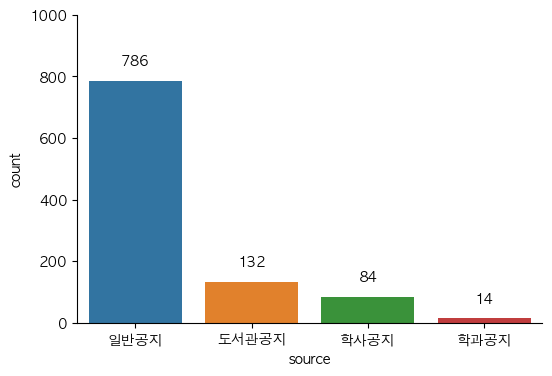

In [11]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=missing_df['source'], order = missing_df['source'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 50, int(height), ha='center', size=10)

ax.set_ylim(0,1000)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
plt.show()

- 동적인 정보이므로, 시시각각으로 변할 수 있음
- 우선은 확보된 데이터 수가 16847개의 제목이었으므로 제거 진행

In [12]:
df = df[df['content'].notnull()]

## Content 내용 전처리

In [13]:
df.head()['content']

0                                교육/대학학사안내/자료실 에 있습니다.
1    증명서발급 무료 서비스 실시 안내 \n\t\t \n\n『 국립학교의 각종 증명 발급...
2    제적시 등록금 반환금액은 다음과 같습니다 . \n\n\t1. 관련 : 대학 등록금에...
3    군제대 일자가 개학 이후이나 휴가 등으로 학기중 출석에 문제가 되지 않을 경우 복학...
4    앞당겨 복학 가능합니다.\n단, 미리 복학하여 역학기 복학 할 경우 수강신청에 주의...
Name: content, dtype: object

In [14]:
import re

def content_preprocessing(content):
    content = re.sub(r'\n\t+','\n',content)
    content = re.sub(r'\n\s*\n+', '\n\n',content)
    return content

In [15]:
df['content'] = df['content'].apply(content_preprocessing)

## content의 길이 확인

/opt/homebrew/anaconda3/envs/chatbot/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


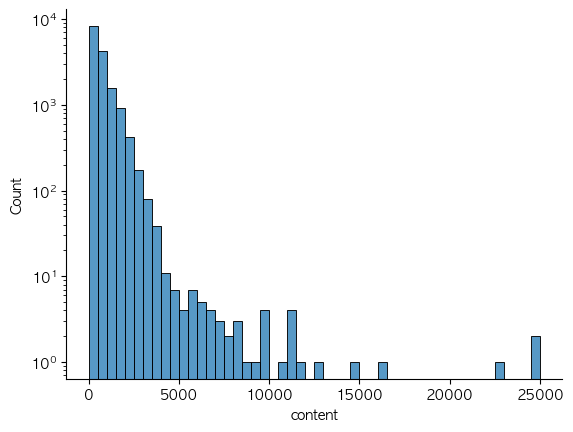

In [16]:
ax = sns.histplot(x = df['content'].apply(lambda s: len(s)), binwidth=500)
plt.yscale('log')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
plt.show()

In [17]:
df['content'].apply(lambda s: len(s)).describe()

count    15880.000000
mean       681.737846
std        813.145910
min          1.000000
25%        232.000000
50%        470.000000
75%        888.000000
max      24825.000000
Name: content, dtype: float64

In [18]:
df[df['content'].apply(lambda x: len(x))<15].head()

,title,content,category,url,source,date
122,학년별 수강신청 기간에 신청한 강의를 전체 수강신청 기간에 취소 할 수 있나요?\n...,가능합니다. 감사합니다.,NaN,NaN,Q&A,2024-02-15
299,비교과 졸업 이수요건 충족을 위해 독서 인증 평가 신청을 하려고 하는데 휴학생도 평...,휴학생도 신청 가능합니다,NaN,NaN,Q&A,2022-08-04
785,"1,4학년이 2,3학년 수강신청기간에 접속해서 2,3학년 수강과목 신청할 수 있나요?",아니요. 불가합니다.,NaN,NaN,Q&A,2020-01-23
827,군 휴학후 2020-1학기 복학예정 입니다.\n다름이 아니라 제가 군 복무중 참여했...,전화로 답변드렸습니다.,NaN,NaN,Q&A,2019-12-06
897,컴공 컴퓨터 시스템 최신 기술이 지금 수강 신청 인원이 저 포함 4명입니다.\n\n...,학과로 문의 바랍니다.,NaN,NaN,Q&A,2019-08-21


In [19]:
len(df[df['content'].apply(lambda x: len(x))<15])

36

- 길이가 15 미만인 것 삭제
- 20의 경우, Q&A에 대한 답변도 포함되는 것을 확인할 수 있어 우선은 보류 

In [20]:
df = df[df['content'].apply(lambda x: len(x))>=15]

In [21]:
len(df)

15844

In [22]:
df.reset_index(drop = True, inplace = True)

In [23]:
df[df['content'].apply(lambda x: len(x))>=1500]

,title,content,category,url,source,date
86,교육과정의 편성 원칙,교육과정의 편성 원칙 \n공통 사항 \n\n가. 각 과정의 학점은 한 학기에 15시...,교육과정구성,https://www.kumoh.ac.kr/ko/sub02_03_04_03.do,교육과정 안내,NaN
87,교육과정별 이수 원칙,공통 사항 \n\n가.교육과정의 이수는 재학 학년도의 교육과정을 적용한다. \n나....,이수기준,https://www.kumoh.ac.kr/ko/sub02_03_04_02.do,교육과정 안내,NaN
89,교육과정 이수 기준표,교육과정 이수 기준표 \n| 학 부(과) | 교양 | MSC\n(기초도구) | 전공...,이수기준,https://www.kumoh.ac.kr/ko/sub02_03_04_02.do,교육과정 안내,NaN
90,2021학년도 이전 입학자 교육과정 이수 기준표,2021학년도 이전 입학자 교육과정 이수 기준표 \n| 학 부(과) | 교양 | M...,이수기준,https://www.kumoh.ac.kr/ko/sub02_03_04_02.do,교육과정 안내,NaN
91,2019학년도 이전 입학자 교육과정 이수 기준표,2019학년도 이전 입학자 교육과정 이수 기준표 \n| 학 부(과) | 교양 | M...,이수기준,https://www.kumoh.ac.kr/ko/sub02_03_04_02.do,교육과정 안내,NaN
...,...,...,...,...,...,...
15511,EBSCO 온라인 이용교육 일정 안내(3.12.~4.23),3-4월 EBSCO 온라인 이용교육 일정을 다음과 같이 안내하오니 많은 참여바랍니다...,NaN,NaN,도서관공지,2021-03-03
15512,신착 전자책(eBook) 목록 안내(2021.2),신착 전자책(2021.2) 자료를 안내하오니 많은 이용바랍니다. \n\n※ 이용방법...,NaN,NaN,도서관공지,2021-02-26
15594,[온라인 교육] 4월 엡스코 온라인 이용교육 일정,코로나19 확산에 따라 집합교육을 진행하기 어려운 상황으로 아래와 같이 온라인교육을...,NaN,NaN,도서관공지,2020-04-06
15633,중국인 유학생을 위한 온라인 중국어 이용 교육 안내,ProQuest의 다양한 학술DB의 이용방법을 중국어로 익힐 수 있는 좋은 기회이니...,NaN,NaN,도서관공지,2019-09-27


## 카테고리 별 데이터 수

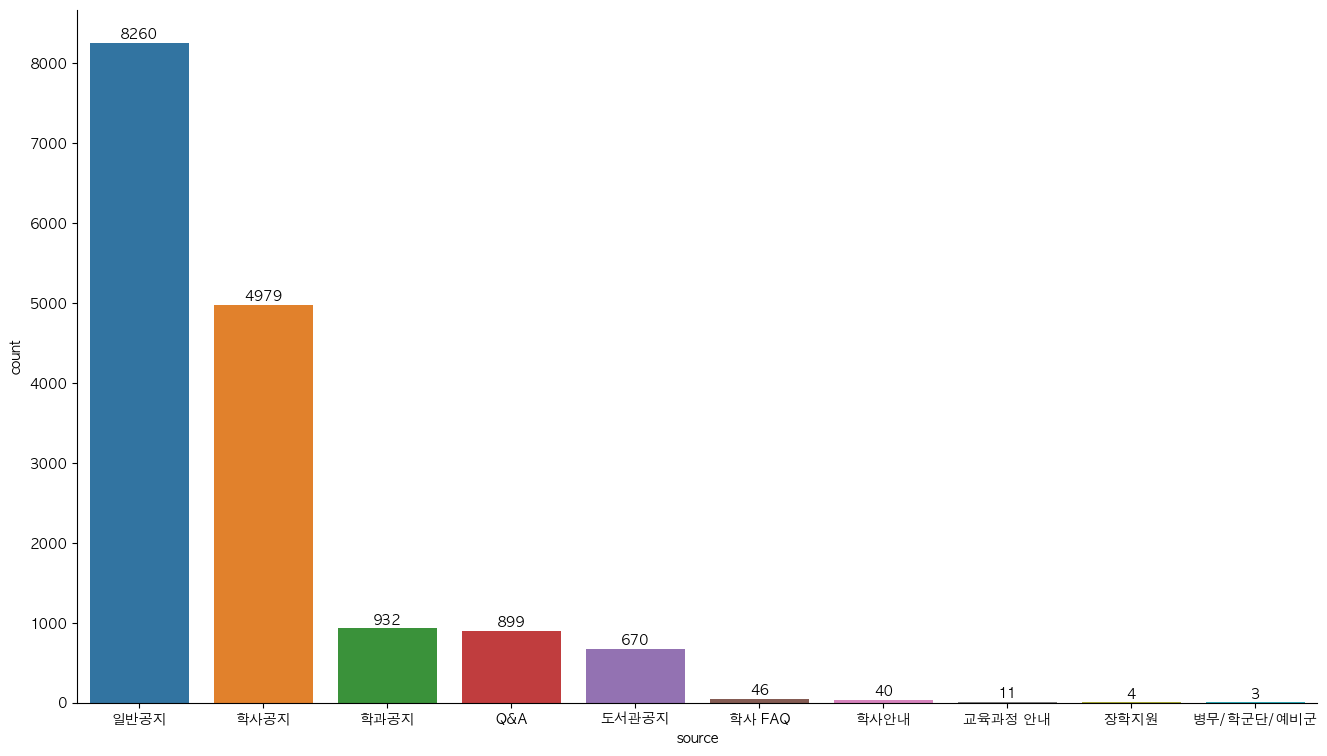

In [24]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x=df['source'], order = df['source'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 50, int(height), ha='center', size=10)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
plt.show()

In [25]:
df.to_csv('../datasets/datasets.csv', index_label = 'id', encoding = 'utf8')